In [ ]:
# Object oriented programming

In [1]:
stuff=list()
stuff.append('python')
stuff.append('chuck')
stuff.sort()
print(stuff[0])

print(stuff.__getitem__(0))
print(list.__getitem__(stuff,0))

chuck
chuck
chuck


In [31]:
class PartyAnimal:
    x=0
    
    def party(self):
        self.x=self.x+1
        print("So far", self.x)
    def summation(self, PartyAnymal):
        print(self.x+PartyAnymal.x)
        #return len(self.x)

In [32]:
an=PartyAnimal()
print("Type", type(an))
print("Dir", dir(an))

an.party()
an.party()
an.party()

Type <class '__main__.PartyAnimal'>
Dir ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'party', 'summation', 'x']
So far 1
So far 2
So far 3


In [33]:
b=PartyAnimal()
b.party()
an.summation(b)

So far 1
4


## Object lifecycle

In [40]:
class PartyAnimal:
    x=0 
    def __init__(self):
        print("I am constructed")
    def party(self):
        self.x=self.x+1
        print("So far", self.x)        
    def __del__(self):
        print("I am destructed",self.x)

In [41]:
an=PartyAnimal()

an.party()

an.party()

an.party()

I am constructed
So far 1
So far 2
So far 3


In [42]:
an.x=32

In [43]:
an.party()

So far 33


In [44]:
an=42

I am destructed 33


In [39]:
type(an)

int

## Constructrors

In [19]:
class PartyAnimal:
    x=0
    name=""
    
    def __init__(self,nam):
        self.name=nam
        print self.name, "constructed"
        
    def party(self):
        self.x=self.x+1
        print self.name,"party count",self.x
        
s=PartyAnimal("Sally")
s.party()

j=PartyAnimal("Jim")
j.party()
s.party()

Sally constructed
Sally party count 1
Jim constructed
Jim party count 1
Sally party count 2


## Inheritance

In [20]:
class PartyAnimal:
    x=0
    name=""
    
    def __init__(self,nam):
        self.name=nam
        print self.name, "constructed"
        
    def party(self):
        self.x=self.x+1
        print self.name,"party count",self.x
        
class FootballFan(PartyAnimal):
    points=0
    def touchdown(self):
        self.points=self.points+7
        self.party()
        print self.name, "points", self.points

In [21]:
s=PartyAnimal("Sally")

Sally constructed


In [22]:
s.party()

Sally party count 1


In [23]:
j=FootballFan("Jim")

Jim constructed


In [24]:
j.party()

Jim party count 1


In [25]:
j.touchdown()

Jim party count 2
Jim points 7


## Week2, Relational Databases

In [ ]:
#we have a database sql1.db in working directory
#Creating a table
CREATE TABLE Users (
    name VARCHAR(128),
    email VARCHAR(128)
)

#CRUD: create read update delete

INSERT INTO Users (name, email) VALUES ('Kristin', 'kf@umich.edu')

DELETE FROM Users Where email='fred@umich.edu'

UPDATE Users SET name='Charles' WHERE email='csev@umich.edu'

SELECT * FROM Users

SELECT * FROM Users ORDER BY email

SELECT * FROM Users ORDER BY name
 

## twspider : storing twitter data in the database

In [47]:
from urllib.request import urlopen
import urllib.error
import twurl
import json
import sqlite3
import ssl


TWITTER_URL = 'https://api.twitter.com/1.1/friends/list.json'

conn = sqlite3.connect('spider.sqlite')
cur = conn.cursor()

cur.execute('''
            CREATE TABLE IF NOT EXISTS Twitter
            (name TEXT, retrieved INTEGER, friends INTEGER)''')
# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

while True:
    acct = input('Enter a Twitter account, or quit: ')
    if (acct == 'quit'): break
    if (len(acct) < 1):
        cur.execute('SELECT name FROM Twitter WHERE retrieved = 0 LIMIT 1')
        try:
            acct = cur.fetchone()[0]
        except:
            print('No unretrieved Twitter accounts found')
            continue

    url = twurl.augment(TWITTER_URL, {'screen_name': acct, 'count': '5'})
    print('Retrieving', url)
    connection = urlopen(url, context=ctx)
    data = connection.read().decode()
    headers = dict(connection.getheaders())

    print('Remaining', headers['x-rate-limit-remaining'])
    js = json.loads(data)
    # Debugging
    # print json.dumps(js, indent=4)

    cur.execute('UPDATE Twitter SET retrieved=1 WHERE name = ?', (acct, ))

    countnew = 0
    countold = 0
    for u in js['users']:
        friend = u['screen_name']
        print(friend)
        cur.execute('SELECT friends FROM Twitter WHERE name = ? LIMIT 1',
                    (friend, ))
        try:
            count = cur.fetchone()[0]
            cur.execute('UPDATE Twitter SET friends = ? WHERE name = ?',
                        (count+1, friend))
            countold = countold + 1
        except:
            cur.execute('''INSERT INTO Twitter (name, retrieved, friends)
                        VALUES (?, 0, 1)''', (friend, ))
            countnew = countnew + 1
    print('New accounts=', countnew, ' revisited=', countold)
    conn.commit()

cur.close()

Enter a Twitter account, or quit: nyirock
Retrieving https://api.twitter.com/1.1/friends/list.json?oauth_timestamp=1500243880&oauth_signature=lZZ0Kd%2BvI%2BB5HWHHWQAviezjLQY%3D&screen_name=nyirock&count=5&oauth_consumer_key=4Se8J018D88z8jWQTOkRKQ5jY&oauth_nonce=74933877&oauth_signature_method=HMAC-SHA1&oauth_version=1.0&oauth_token=2789693187-XKWOu889GcaeU1BOERBvrRLvfbgvUVkV68da9MW
Remaining 14
lonelyplanet
NatGeoTravel
PopSci
sciencemagazine
NatGeoPhotos
New accounts= 5  revisited= 0
Enter a Twitter account, or quit: lonelyplanet
Retrieving https://api.twitter.com/1.1/friends/list.json?oauth_timestamp=1500243899&oauth_signature=Oe%2BTiso3llASVz1ikp4B2ET6F8Y%3D&screen_name=lonelyplanet&count=5&oauth_consumer_key=4Se8J018D88z8jWQTOkRKQ5jY&oauth_nonce=01036997&oauth_signature_method=HMAC-SHA1&oauth_version=1.0&oauth_token=2789693187-XKWOu889GcaeU1BOERBvrRLvfbgvUVkV68da9MW
Remaining 13
TeamHandstand
gregfoot
kaustubhyk
GBCedarPark
MegoYugo
New accounts= 5  revisited= 0
Enter a Twitter acc

assignment 1

In [ ]:
CREATE TABLE Ages ( 
  name VARCHAR(128), 
  age INTEGER
)

DELETE FROM Ages;
INSERT INTO Ages (name, age) VALUES ('Ainslie', 32);
INSERT INTO Ages (name, age) VALUES ('Hania', 27);
INSERT INTO Ages (name, age) VALUES ('Rahil', 31);
INSERT INTO Ages (name, age) VALUES ('Oluwademilade', 30);
INSERT INTO Ages (name, age) VALUES ('Hamish', 19);

SELECT hex(name || age) AS X FROM Ages ORDER BY X

In [57]:
#created and populated assignment1.db
import sqlite3
conn = sqlite3.connect('assignment1.db')
cur = conn.cursor()

cur.execute('''SELECT hex(name || age) AS X FROM Ages ORDER BY X''')
for row in cur:
    print(row)
cur.close()

('41696E736C69653332',)
('48616D6973683139',)
('48616E69613237',)
('4F6C75776164656D696C6164653330',)
('526168696C3331',)


In [55]:
print(data.fetchall)

<built-in method fetchall of sqlite3.Cursor object at 0x000000978A468A40>


To get credit for this assignment, perform the instructions below and upload your SQLite3 database here:
(Must have a .sqlite suffix)
Hint: The top organizational count is 536.
You do not need to export or convert the database - simply upload the .sqlite file that your program creates. See the example code for the use of the connect() statement. 

In [4]:
%%time
import sqlite3

conn = sqlite3.connect('emaildb.sqlite')
cur = conn.cursor()

cur.execute('''
DROP TABLE IF EXISTS Counts''')

cur.execute('''
CREATE TABLE Counts (email TEXT, count INTEGER)''')

fname = input('Enter file name: ')
if (len(fname) < 1): fname = 'mbox-short.txt'
fh = open(fname)
for line in fh:
    if not line.startswith('From: '): continue
    pieces = line.split()
    email = pieces[1]
    cur.execute('SELECT count FROM Counts WHERE email = ? ', (email,))
    row = cur.fetchone()
    if row is None:
        cur.execute('''INSERT INTO Counts (email, count)
                VALUES (?, 1)''', (email,))
    else:
        cur.execute('UPDATE Counts SET count = count + 1 WHERE email = ?',
                    (email,))
    conn.commit()

# https://www.sqlite.org/lang_select.html
sqlstr = 'SELECT email, count FROM Counts ORDER BY count DESC LIMIT 10'

for row in cur.execute(sqlstr):
    print(str(row[0]), row[1])

cur.close()


Enter file name: 
cwen@iupui.edu 5
zqian@umich.edu 4
david.horwitz@uct.ac.za 4
louis@media.berkeley.edu 3
gsilver@umich.edu 3
stephen.marquard@uct.ac.za 2
rjlowe@iupui.edu 2
wagnermr@iupui.edu 1
antranig@caret.cam.ac.uk 1
gopal.ramasammycook@gmail.com 1
Wall time: 13.4 s


In [18]:
%%time
import MySQLdb

db = MySQLdb.connect(host="localhost",    # your host, usually localhost
                     user="dbwithpython",         # your username
                     passwd="dbwithpython",  # your password
                     db="dbwithpython")        # name of the data base

# you must create a Cursor object. It will let
#  you execute all the queries you need
cur = db.cursor()

cur.execute('''
DROP TABLE IF EXISTS Counts''')

cur.execute('''
CREATE TABLE Counts (email VARCHAR(250), count INTEGER)''')

fname = input('Enter file name: ')
if (len(fname) < 1): fname = 'mbox-short.txt'
fh = open(fname)
for line in fh:
    if not line.startswith('From: '): continue
    pieces = line.split()
    email = pieces[1]
    #print('Ha')
    cur.execute('SELECT count FROM Counts WHERE email = %s ', (email,))
    #print('Haha')
    row = cur.fetchone()
    if row is None:
        cur.execute('''INSERT INTO Counts (email, count)
                VALUES (%s, 1)''', (email,))
        #print('Hahaha')
    else:
        cur.execute('UPDATE Counts SET count = count + 1 WHERE email = %s',
                    (email,))
    db.commit()

# https://www.sqlite.org/lang_select.html
sqlstr = 'SELECT email, count FROM Counts ORDER BY count DESC LIMIT 10'

with db.cursor() as cur:
    sqlstr = 'SELECT email, count FROM Counts ORDER BY count DESC LIMIT 10'
    cur.execute(sqlstr)
    results = cur.fetchall()
for row in results:
    print(str(row[0]), row[1])
    

cur.close()

Enter file name: mbox.txt
zqian@umich.edu 195
mmmay@indiana.edu 161
cwen@iupui.edu 158
chmaurer@iupui.edu 111
aaronz@vt.edu 110
ian@caret.cam.ac.uk 96
jimeng@umich.edu 93
rjlowe@iupui.edu 90
dlhaines@umich.edu 84
david.horwitz@uct.ac.za 67
Wall time: 1min 23s


In [66]:
%%time
import sqlite3

# conn = sqlite3.connect('emaildb.sqlite')
# cur = conn.cursor()

# cur.execute('''
# DROP TABLE IF EXISTS Counts''')

# cur.execute('''
# CREATE TABLE Counts (email TEXT, count INTEGER)''')

emails=dict()

fname = input('Enter file name: ')
if (len(fname) < 1): fname = 'mbox-short.txt'
fh = open(fname)
for line in fh:
    if not line.startswith('From: '): continue
    pieces = line.split()
    email = pieces[1]
    emails[email]=emails.get(email,0)+1

# https://www.sqlite.org/lang_select.html
#sqlstr = 'SELECT email, count FROM Counts ORDER BY count DESC LIMIT 10'

for item in sorted([(value,key) for (key,value) in emails.items()], reverse=True):
    print(item[1], item[0])

Enter file name: 
cwen@iupui.edu 5
zqian@umich.edu 4
david.horwitz@uct.ac.za 4
louis@media.berkeley.edu 3
gsilver@umich.edu 3
stephen.marquard@uct.ac.za 2
rjlowe@iupui.edu 2
wagnermr@iupui.edu 1
ray@media.berkeley.edu 1
gopal.ramasammycook@gmail.com 1
antranig@caret.cam.ac.uk 1
Wall time: 613 ms


In [82]:
%%time
import sqlite3

conn = sqlite3.connect('emaildb.sqlite')
cur = conn.cursor()

cur.execute('''
DROP TABLE IF EXISTS Counts''')

cur.execute('''
CREATE TABLE Counts (email TEXT, count INTEGER)''')

emails=dict()
dict_size=100
fname = input('Enter file name: ')
if (len(fname) < 1): fname = 'mbox-short.txt'
fh = open(fname)
lines=fh.readlines()
for line in lines:
    if (len(emails)>=dict_size) or (line==lines[-1]):
        for key,value in emails.items():
            cur.execute('SELECT count FROM Counts WHERE email = ? ', (key,))
            row = cur.fetchone()
            if row is None:
                cur.execute('''INSERT INTO Counts (email, count)
                        VALUES (?, ?)''', (key,value,))
            else:
                cur.execute('UPDATE Counts SET count = count + ? WHERE email = ?',
                            (value, key,))
            conn.commit()
        emails=dict()
    if not line.startswith('From: '): continue
    pieces = line.split()
    email = pieces[1]
    emails[email]=emails.get(email,0)+1


sqlstr = 'SELECT email, count FROM Counts ORDER BY count DESC LIMIT 10'

for row in cur.execute(sqlstr):
    print(str(row[0]), row[1])

cur.close()
# https://www.sqlite.org/lang_select.html
#sqlstr = 'SELECT email, count FROM Counts ORDER BY count DESC LIMIT 10'

# for item in sorted([(value,key) for (key,value) in emails.items()], reverse=True):
#     print(item[1], item[0])

Enter file name: mbox.txt
zqian@umich.edu 195
mmmay@indiana.edu 161
cwen@iupui.edu 158
chmaurer@iupui.edu 111
aaronz@vt.edu 110
ian@caret.cam.ac.uk 96
jimeng@umich.edu 93
rjlowe@iupui.edu 90
dlhaines@umich.edu 84
david.horwitz@uct.ac.za 67
Wall time: 3min 5s


In [77]:
v=1
s='UPDATE Counts SET count = count + {0} WHERE email = ?'.format(v)
print(s)

UPDATE Counts SET count = count + 1 WHERE email = ?


In [69]:
%%time
import sqlite3

conn = sqlite3.connect('assignment2.sqlite')
cur = conn.cursor()

cur.execute('''
DROP TABLE IF EXISTS Counts''')

cur.execute('''
CREATE TABLE Counts (org TEXT, count INTEGER)''')

fname = input('Enter file name: ')
if (len(fname) < 1): fname = 'mbox-short.txt'
fh = open(fname)
for line in fh:
    if not line.startswith('From: '): continue
    pieces = line.split()
    org = pieces[1].split('@')[1]
    cur.execute('SELECT count FROM Counts WHERE org = ? ', (org,))
    row = cur.fetchone()
    if row is None:
        cur.execute('''INSERT INTO Counts (org, count)
                VALUES (?, 1)''', (org,))
    else:
        cur.execute('UPDATE Counts SET count = count + 1 WHERE org = ?',
                    (org,))
    conn.commit()

# https://www.sqlite.org/lang_select.html
sqlstr = 'SELECT org, count FROM Counts ORDER BY count DESC LIMIT 10'

for row in cur.execute(sqlstr):
    print(str(row[0]), row[1])

cur.close()


Enter file name: mbox.txt
iupui.edu 536
umich.edu 491
indiana.edu 178
caret.cam.ac.uk 157
vt.edu 110
uct.ac.za 96
media.berkeley.edu 56
ufp.pt 28
gmail.com 25
et.gatech.edu 17
Wall time: 3min 14s


## Efficiencies: dict vs SQlite vs MySql

In [1]:
import time
import MySQLdb
import sqlite3


In [19]:
def emailDict(file=""):
    
    # conn = sqlite3.connect('emaildb.sqlite')
    # cur = conn.cursor()

    # cur.execute('''
    # DROP TABLE IF EXISTS Counts''')

    # cur.execute('''
    # CREATE TABLE Counts (email TEXT, count INTEGER)''')

    emails=dict()
    
    if file:
        fname=file
    else:
    
        fname = input('Enter file name: ')
        if (len(fname) < 1): fname = 'mbox-short.txt'
    fh = open(fname)
    for line in fh:
        if not line.startswith('From: '): continue
        pieces = line.split()
        email = pieces[1]
        emails[email]=emails.get(email,0)+1

    # https://www.sqlite.org/lang_select.html
    #sqlstr = 'SELECT email, count FROM Counts ORDER BY count DESC LIMIT 10'
    return emails


import time
def emailMySql(file=""):



    db = MySQLdb.connect(host="localhost",    # your host, usually localhost
                         user="dbwithpython",         # your username
                         passwd="dbwithpython",  # your password
                         db="dbwithpython")        # name of the data base

    # you must create a Cursor object. It will let
    #  you execute all the queries you need
    cur = db.cursor()

    cur.execute("DROP TABLE IF EXISTS Counts ")

    cur.execute('''
    CREATE TABLE Counts (email VARCHAR(250), count INTEGER)''')

    if file:
        fname=file
    else:
    
        fname = input('Enter file name: ')
        if (len(fname) < 1): fname = 'mbox-short.txt'
    fh = open(fname)
    for line in fh:
        if not line.startswith('From: '): continue
        pieces = line.split()
        email = pieces[1]
        #print('Ha')
        cur.execute('SELECT count FROM Counts WHERE email = %s ', (email,))
        #print('Haha')
        row = cur.fetchone()
        if row is None:
            cur.execute('''INSERT INTO Counts (email, count)
                    VALUES (%s, 1)''', (email,))
            #print('Hahaha')
        else:
            cur.execute('UPDATE Counts SET count = count + 1 WHERE email = %s',
                        (email,))
        db.commit()

    return db

def emailMySql_opt(file=""):



    db = MySQLdb.connect(host="localhost",    # your host, usually localhost
                         user="dbwithpython",         # your username
                         passwd="dbwithpython",  # your password
                         db="dbwithpython")        # name of the data base

    # you must create a Cursor object. It will let
    #  you execute all the queries you need
    cur = db.cursor()

    cur.execute("DROP TABLE IF EXISTS Counts ")

    cur.execute('''
    CREATE TABLE Counts (email VARCHAR(250), count INTEGER)''')

    if file:
        fname=file
    else:
    
        fname = input('Enter file name: ')
        if (len(fname) < 1): fname = 'mbox-short.txt'
    fh = open(fname)
    for line in fh:
        if not line.startswith('From: '): continue
        pieces = line.split()
        email = pieces[1]
        #print('Ha')
        cur.execute('SELECT count FROM Counts WHERE email = %s ', (email,))
        #print('Haha')
        row = cur.fetchone()
        if row is None:
            cur.execute('''INSERT INTO Counts (email, count)
                    VALUES (%s, 1)''', (email,))
            #print('Hahaha')
        else:
            cur.execute('UPDATE Counts SET count = count + 1 WHERE email = %s',
                        (email,))
    db.commit()

    return db

def emailSQlite(file=""):

    conn = sqlite3.connect('emaildb.sqlite')
    cur = conn.cursor()

    cur.execute('''
    DROP TABLE IF EXISTS Counts''')

    cur.execute('''
    CREATE TABLE Counts (email TEXT, count INTEGER)''')

    if file:
        fname=file
    else:
    
        fname = input('Enter file name: ')
        if (len(fname) < 1): fname = 'mbox-short.txt'
    fh = open(fname)
    
    for line in fh:
        if not line.startswith('From: '): continue
        pieces = line.split()
        email = pieces[1]
        cur.execute('SELECT count FROM Counts WHERE email = ? ', (email,))
        row = cur.fetchone()
        if row is None:
            cur.execute('''INSERT INTO Counts (email, count)
                    VALUES (?, 1)''', (email,))
        else:
            cur.execute('UPDATE Counts SET count = count + 1 WHERE email = ?',
                        (email,))
        conn.commit()

    # https://www.sqlite.org/lang_select.html
    sqlstr = 'SELECT email, count FROM Counts ORDER BY count DESC LIMIT 10'


    return cur
def emailSQlite_opt(file=""):

    conn = sqlite3.connect('emaildb.sqlite')
    cur = conn.cursor()

    cur.execute('''
    DROP TABLE IF EXISTS Counts''')

    cur.execute('''
    CREATE TABLE Counts (email TEXT, count INTEGER)''')

    if file:
        fname=file
    else:
    
        fname = input('Enter file name: ')
        if (len(fname) < 1): fname = 'mbox-short.txt'
    fh = open(fname)
    
    for line in fh:
        if not line.startswith('From: '): continue
        pieces = line.split()
        email = pieces[1]
        cur.execute('SELECT count FROM Counts WHERE email = ? ', (email,))
        row = cur.fetchone()
        if row is None:
            cur.execute('''INSERT INTO Counts (email, count)
                    VALUES (?, 1)''', (email,))
        else:
            cur.execute('UPDATE Counts SET count = count + 1 WHERE email = ?',
                        (email,))
    conn.commit()

    # https://www.sqlite.org/lang_select.html
    sqlstr = 'SELECT email, count FROM Counts ORDER BY count DESC LIMIT 10'


    return cur









In [3]:
ncycles=3

In [4]:
for i in range(ncycles):
    start=time.time()
    emails=emailDict(file="mbox-short.txt")
print("%s s elapsed"%format(str((time.time()-start)/ncycles)))

for item in sorted([(value,key) for (key,value) in emails.items()], reverse=True):
    print(item[1], item[0])

0.00033346811930338543 s elapsed
cwen@iupui.edu 5
zqian@umich.edu 4
david.horwitz@uct.ac.za 4
louis@media.berkeley.edu 3
gsilver@umich.edu 3
stephen.marquard@uct.ac.za 2
rjlowe@iupui.edu 2
wagnermr@iupui.edu 1
ray@media.berkeley.edu 1
gopal.ramasammycook@gmail.com 1
antranig@caret.cam.ac.uk 1


In [4]:
def convert_bytes(num):
    """
    this function will convert bytes to MB.... GB... etc
    """
    for x in ['bytes', 'KB', 'MB', 'GB', 'TB']:
        if num < 1024.0:
            return "%3.1f %s" % (num, x)
        num /= 1024.0

import os
(os.path.getsize('mbox-short.txt'))

94626

In [5]:
files=["mbox-short.txt",
       "mbox0.5.txt",
       "mbox.txt",
       "mbox2.txt",
       "mbox5.txt",
       "mbox10.txt"]
for file in files:
    print("size of",file,"is:",convert_bytes(os.path.getsize(file)))

size of mbox-short.txt is: 92.4 KB
size of mbox0.5.txt is: 3.3 MB
size of mbox.txt is: 6.4 MB
size of mbox2.txt is: 12.8 MB
size of mbox5.txt is: 31.9 MB
size of mbox10.txt is: 63.8 MB


In [6]:
test_dct=list()
file_sizes=list()
for file in files:
    for i in range(ncycles):
        start=time.time()
        emails=emailDict(file=file)
    elapsed_avg=(time.time()-start)/ncycles
    test_dct.append(elapsed_avg)
    file_sizes.append(os.path.getsize(file))
#db.close()
#     print("%s s elapsed"%format(str(elapsed)))

#     for item in sorted([(value,key) for (key,value) in emails.items()], reverse=True):
#         print(item[1], item[0])

In [8]:
ncycles=1
test_mysql=list()
file_sizes=list()
for file in files:
    for i in range(ncycles):
        start=time.time()
        db=emailMySql(file=file)
    elapsed_avg=(time.time()-start)/ncycles
    print(elapsed_avg,"s")
    test_mysql.append(elapsed_avg)
    file_sizes.append(os.path.getsize(file))
db.close()

1.3854806423187256 s
41.31173825263977 s
84.31100368499756 s
168.70981335639954 s
414.2281029224396 s
826.3986208438873 s


In [9]:
test_mysql

[1.3854806423187256,
 41.31173825263977,
 84.31100368499756,
 168.70981335639954,
 414.2281029224396,
 826.3986208438873]

In [25]:
ncycles=1
test_mysql=list()
file_sizes=list()
for file in files:
    for i in range(ncycles):
        start=time.time()
        db=emailMySql_opt(file=file)
    elapsed_avg=(time.time()-start)/ncycles
    print(elapsed_avg,"s")
    test_mysql.append(elapsed_avg)
    file_sizes.append(os.path.getsize(file))
db.close()

0.6249423027038574 s
0.756535530090332 s
0.9681839942932129 s
1.3909838199615479 s
2.9160642623901367 s
5.448354959487915 s


In [23]:
test_mysql

[0.497852087020874,
 1.1167919635772705,
 1.5821192264556885,
 2.433722734451294,
 2.9245691299438477,
 5.432344436645508]

In [7]:
ncycles=1
test_sqlite=list()
file_sizes=list()
for file in files:
    for i in range(ncycles):
        start=time.time()
        cur=emailSQlite(file=file)
    elapsed_avg=(time.time()-start)/ncycles
    print(elapsed_avg,"s")
    test_sqlite.append(elapsed_avg)
    file_sizes.append(os.path.getsize(file))
cur.close()

2.3071329593658447 s
91.02301549911499 s
200.79262804985046 s
394.8466143608093 s
984.1553418636322 s
2005.2575192451477 s


In [25]:
test_sqlite

[0.0003333091735839844,
 0.0008339087168375651,
 0.0028350353240966797,
 0.011174678802490234,
 0.02084835370381673,
 0.04286384582519531,
 0.09506758054097493,
 0.20214271545410156]

In [26]:
ncycles=1
test_sqlite=list()
file_sizes=list()
for file in files:
    for i in range(ncycles):
        start=time.time()
        cur=emailSQlite_opt(file=file)
    elapsed_avg=(time.time()-start)/ncycles
    print(elapsed_avg,"s")
    test_sqlite.append(elapsed_avg)
    file_sizes.append(os.path.getsize(file))
cur.close()

0.273937463760376 s
0.29070496559143066 s
0.3502490520477295 s
0.3827695846557617 s
0.7250134944915771 s
1.099280595779419 s


In [21]:
test_sqlite

[0.2902059555053711,
 0.44981813430786133,
 0.4573230743408203,
 0.533876895904541,
 0.7240128517150879,
 1.1338019371032715]

In [ ]:
test_dct=list()
file_sizes=list()
for file in files:
    for i in range(ncycles):
        start=time.time()
        cur=emailSQlite(file=file)
    elapsed_avg=(time.time()-start)/ncycles
    test_dct.append(elapsed_avg)
    file_sizes.append(os.path.getsize(file))
cur.close()

In [11]:
for i in range(ncycles):
    start=time.time()
    cur=emailSQlite(file="mbox-short.txt")
print("%s s elapsed"%format(str((time.time()-start)/ncycles)))


sqlstr = 'SELECT email, count FROM Counts ORDER BY count DESC LIMIT 10'

for row in cur.execute(sqlstr):
    print(str(row[0]), row[1])

cur.close()

0.8247172037760416 s elapsed
cwen@iupui.edu 5
zqian@umich.edu 4
david.horwitz@uct.ac.za 4
louis@media.berkeley.edu 3
gsilver@umich.edu 3
stephen.marquard@uct.ac.za 2
rjlowe@iupui.edu 2
wagnermr@iupui.edu 1
antranig@caret.cam.ac.uk 1
gopal.ramasammycook@gmail.com 1


In [14]:
for i in range(ncycles):
    start=time.time()
    db=emailMySql(file="mbox-short.txt")
print("%s s elapsed"%format(str((time.time()-start)/ncycles)))


with db.cursor() as cur:
    sqlstr = 'SELECT email, count FROM Counts ORDER BY count DESC LIMIT 10'
    cur.execute(sqlstr)
    results = cur.fetchall()
for row in results:
    print(str(row[0]), row[1])


db.close()

0.43047142028808594 s elapsed
cwen@iupui.edu 5
zqian@umich.edu 4
david.horwitz@uct.ac.za 4
gsilver@umich.edu 3
louis@media.berkeley.edu 3
stephen.marquard@uct.ac.za 2
rjlowe@iupui.edu 2
wagnermr@iupui.edu 1
antranig@caret.cam.ac.uk 1
gopal.ramasammycook@gmail.com 1


In [11]:
[convert_bytes(os.path.getsize(file)) for file in files]

['92.4 KB',
 '277.2 KB',
 '955.3 KB',
 '3.3 MB',
 '6.4 MB',
 '12.8 MB',
 '31.9 MB',
 '63.8 MB']

In [16]:
np.array(test_dct)/60

array([  5.56045108e-06,   1.86244647e-04,   3.86382474e-04,
         7.58870443e-04,   1.69832574e-03,   3.22450929e-03])

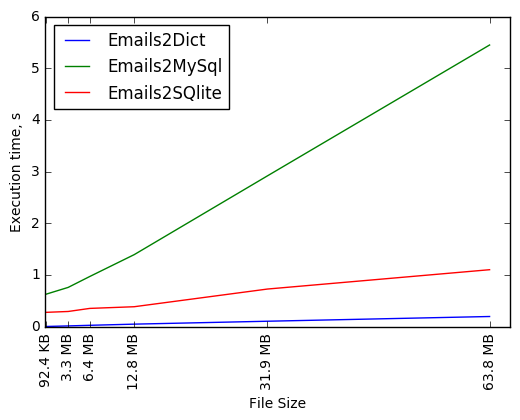

In [27]:
import numpy as np
import matplotlib.pyplot as plt

x_val=[os.path.getsize(file) for file in files]
labels=[convert_bytes(os.path.getsize(file)) for file in files]

plt.plot(x_val, test_dct, x_val, test_mysql, x_val, test_sqlite)
plt.xticks(x_val, labels, rotation=90)
#plt.ylim(0,max(counts.values())*1.1)
#plt.xlim(0,len(x_val)*1.5)
plt.legend(['Emails2Dict','Emails2MySql', 'Emails2SQlite'], loc='upper left')
plt.xlabel("File Size")
plt.ylabel("Execution time, s")
#fig = plt.gcf()
#fig.set_size_inches(18.5, 10.5)
plt.show()

## Week 3: Multi-table Relations: Audio Tracks Listing

In [ ]:
#create database tracks.db
CREATE TABLE `Artist` (
	`id`	INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,
	`name`	TEXT
);

CREATE TABLE `Genre` (
	`id`	INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
	`name`	TEXT
);
CREATE TABLE `Album` (
	`id`	INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
	`artist_id` INTEGER,
	`title`	TEXT
);
CREATE TABLE `Album` (
	`id`	INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
	`title`	TEXT,
	`album_id` INTEGER,
	`genre_id` INTEGER,
	`len` INTEGER, `rating` INTEGER, `count` INTEGER
);
CREATE TABLE `Track` (
	`id`	INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
	`title`	TEXT,
	`album_id` INTEGER,
	`genre_id` INTEGER,
	`len` INTEGER, `rating` INTEGER, `count` INTEGER
);

In [ ]:
#populating data
Insert into Artist (name) values ('Led Zepplin')
Insert into Artist (name) values ('AC/DC')

Insert into Genre (name) values ('Rock');
Insert into Genre (name) values ('Metal')

Insert into Album (title, artist_id) values ('Who Made Who', 2);
Insert into Album (title, artist_id) values ('IV', 1)

Insert into Track (title, rating, len, count, album_id, genre_id) values ('Black Dog', 5, 297, 0, 2, 1);
Insert into Track (title, rating, len, count, album_id, genre_id) values ('Stairway', 5, 482, 0, 2, 1);
Insert into Track (title, rating, len, count, album_id, genre_id) values ('About to Rock', 5, 313, 0, 1, 2);
Insert into Track (title, rating, len, count, album_id, genre_id) values ('Who Made Who', 5, 207, 0, 1, 2)

In [ ]:
#join clause
#relates albums to artists
select Album.title, Artist.name from Album join Artist on Album.artist_id = Artist.id
select Album.title, Artist.name, Album.artist_id, Artist.id from Album join Artist on Album.artist_id = Artist.id